# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, you need to train a classical ML model (no deep learning) to reach the highest accruracy score. Please follow the ML project checklist and make sure you organize your code well.

**Expected Accuracy Score: >89%**

**Submission:** share your notebook to instructors, and prepare your presentation on the next Monday morning.

## Get Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# EDA

In [ ]:
# Your code here
def plot_images(images, labels):
    '''Plot images with their labels. Ten each row'''
    plt.figure(figsize=(20, 10))
    columns = 10
    for i, image in enumerate(images):
        ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
        ax.set_title(f"{labels[i]}", fontsize=16)
        plt.axis('off')
        plt.subplots_adjust(bottom=0.1)
        plt.imshow(image, cmap='gray')

def get_samples(n_samples, X, y):
    '''Get n_samples images randomly'''
    samples = np.random.choice(np.arange(len(y)), n_samples, replace=False)
    return X[samples], y[samples]

def get_digit(digit, n_samples, X, y):
    '''Get n_samples images of the class digit randomly'''
    y_digit = y[y == digit]
    samples = np.random.choice(np.arange(len(y_digit)), n_samples, replace=False)
    return X[y == digit][samples], y_digit[samples]

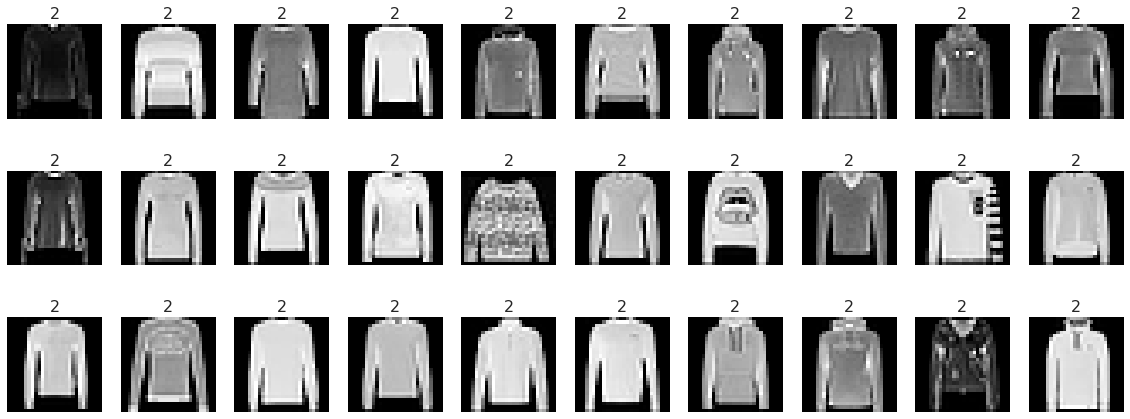

In [ ]:
n_samples = 30
# images, labels = get_samples(n_samples, X_train, y_train)
images, labels = get_digit(2, n_samples, X_train, y_train)
plot_images(images, labels)

In [ ]:
n_samples = 60000
n_test_samples = 10000
# Your code here
X_train_flat, y_train_flat = get_samples(n_samples, X_train, y_train)
X_test_flat, y_test_flat = get_samples(n_test_samples, X_test, y_test)

# Normalization
X_train_flat = X_train_flat.reshape((n_samples, -1))/255
X_test_flat = X_test_flat.reshape((n_test_samples, -1))/255

In [ ]:
print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)

Training data (6000, 784)
Test data (1000, 784)


In [ ]:
# Get all the data
# Run it after you finish training with the 1000 samples
X_train_flat = X_train.reshape((-1, 784))
X_test_flat = X_test.reshape((-1, 784))
y_train_flat = y_train
y_test_flat = y_test

print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)
print('Training label', y_train_flat.shape)
print('Test label', y_test_flat.shape)

Training data (60000, 784)
Test data (10000, 784)
Training label (60000,)
Test label (10000,)


# Train Model

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

**Voting Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=0)
knn = KNeighborsClassifier()
dtc = DecisionTreeClassifier(random_state=0)
svc = SVC(kernel='rbf', degree=10 ,C = 100, gamma =0.001)
classifiers = {('Log Reg', lr),
               ('Knn', knn),                            
               ('Decision Tree Classifier', dtc),
               ('SVM', svc)}
for clf_name, clf in classifiers:
  c = clf
  c.fit(X_train_flat, y_train_flat)
  y_pred = c.predict(X_test_flat)
  print(clf_name, accuracy_score(y_test_flat, y_pred))
  # print('confusion matrix:\n',confusion_matrix(y_test,y_pred))
  # print('classification report:\n',classification_report(y_test,y_pred))
  # print('K-fold cross validation', scores)

SVM 0.838
Knn 0.805
Log Reg 0.813
Decision Tree Classifier 0.719


**Train a SVM model**: 

# Evaluation

**Get the prediction on test data**

In [ ]:
  clf = SVC(kernel='rbf', C=83, gamma =0.04)
  clf.fit(X_train_flat, y_train_flat)

SVC(C=83, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.04, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
# Full Accuracy score for clf = SVC(kernel='rbf', C=83, gamma =0.04) model
predictions = clf.predict(X_test_flat)
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

Accuracy Score: 0.9015


In [ ]:
# Full Accuracy score for SVC(kernel='rbf', C=100, gamma = 0.001) model
predictions = clf.predict(X_test_flat)
print('Accuracy Score:', accuracy_score(y_test_flat, predictions))

**Plot the confusion matrix in form of a heatmap**

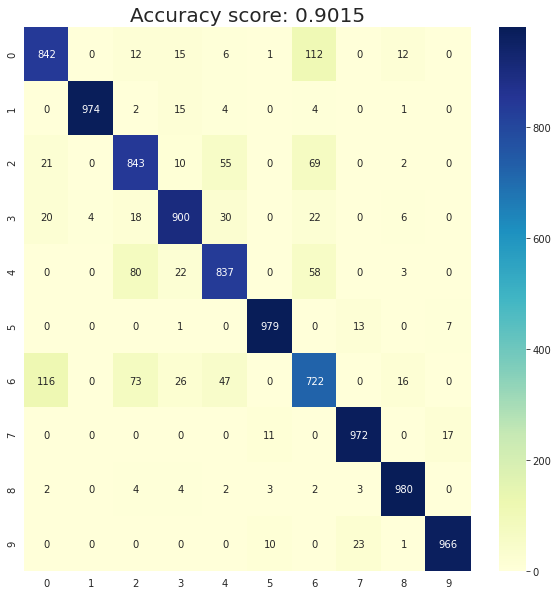

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test_flat, predictions), cmap="YlGnBu", annot=True, fmt="d")
plt.title(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}', fontsize=20)
plt.show()

# Save model

In [ ]:
import pickle

pickle.dump(clf, open('Minh_vu: Fashion_mnist.pkl', 'wb'))

In [ ]:
with open('Minh_vu: Fashion_mnist.pkl', 'rb') as model:
    reload_model = pickle.load(model)

predictions = reload_model.predict(X_test_flat)
print(f'Accuracy score: {accuracy_score(y_test_flat, predictions)}')

Accuracy score: 0.9015
